# Promt development
In this python notebook the promt to detect genetic fallacies is being developed and refined using rens wilderoom framework of promt development for social science development. ( https://docs.google.com/document/d/17GMIdOGSOFJAkbbqWiBqJpNTO2NdjJAUCBRZHJUDs3o/edit?usp=sharing)

## Defining genetic fallacies
Genetic fallacies occur in political speech when arguments or ideas are **accepted** or **dismissed** soley based on their origin rather then content. (https://www.perplexity.ai/search/what-are-genetic-fallacies-in-B1c5Gqr5TyCSCsSpNfM70g)

There are many subcategories including ad hominem, appeal to false authority etc.(https://finmasters.com/genetic-fallacy/)

## Potential challanges 
- context dependency: fallacies might be not just reuslt from the use of language but context dependent. An llm might have inconsistend performance to make sense of the context across different subjects.
- Language: As our data is in dutch, we might face the issue that most opensource llm's are not primarily build to handle langues like dutch.

## Promt

In [1]:
promt = """ You are an expert in analyzing political texts. Analyze the text below for genetic fallacies.

VERY IMPORTANT - OUTPUT RULES:
- Return EXACTLY ONE JSON object.
- NO additional text before or after the JSON.
- NO code markers (```)
- NO repetition of the same analysis.
- NO explanations outside the JSON.

CONTENT RULES:
- Report ONLY the clearest cases (confidence ≥ 0.7).
- DO NOT report weak or questionable cases.
- Focus on UNIQUE cases (not the same statement multiple times).
- Maximum of 5 cases per analysis. 

Definitions of genetic fallacies:
The genetic fallacy is a fallacy of irrelevance in which arguments or information are dismissed or validated based solely on their source of origin rather than their content.In other words, a claim is ignored or given credibility based on its source rather than the claim itself.

Examples of genetic fallacies: 
  - "MISSING"    
  - "MISSING"   


What is NOT a genetic fallacy:
- Insert name for common type of misclassifed fallacy
  Example: "MISSING"    
- Insert name for common type of misclassifed fallacy
  Example: "MISSING"   
  

Confidence Score Guidelines:
- 0.9 - 1.0: Unmistakable delegitimization with clear evidence.  
- 0.7 - 0.9: Clear delegitimization with good context.  
- <0.7: DO NOT REPORT.  

Return the following JSON format:
{{
  "found_fallacy": [
    {{
      "quote": "string (exact quote)",
      "explanation": "string (short justification)",
      "confidence": "float (only ≥ 0.7)",
      "context": "string (relevant context)"
    }}
  ],
  "summary": {{
    "count": "integer",
    "average_confidence": "float",
    "highest_confidence": "float",
    "lowest_confidence": "float"
  }}
}}

If no genetic fallacies with high confidence are found:
{{
  "found_fallacy": [],
  "summary": {{
    "count": 0,
    "average_confidence": 0.0,
    "highest_confidence": 0.0,
    "lowest_confidence": 0.0
  }}
}}

Text to be analyzed:
  {text} """

## Evaluation data set
Source for the 
https://helpfulprofessor.com/genetic-fallacy-examples/

In [2]:
import pandas as pd

fallacy_data = [
    {
        "category": "Appeal to False Authority",
        "text": "The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it relies on a celebrity endorsement, which is irrelevant to the diet's effectiveness."
    },
    {
        "category": "Appeal to False Authority",
        "text": "This new diet plan has been clinically tested and approved by registered dietitians, suggesting it may be effective and healthy.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by basing the claim on relevant expertise and scientific testing."
    },
    {
        "category": "Stereotyping",
        "text": "All pit bulls are dangerous because I heard about some pit bull attacks on the news.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it generalizes an entire breed based on limited information."
    },
    {
        "category": "Stereotyping",
        "text": "Some pit bulls can be dangerous if not properly trained or socialized, as evidenced by reported attacks. However, individual temperament and upbringing play significant roles in a dog's behavior.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging reported incidents but also considering other factors influencing dog behavior."
    },
    {
        "category": "Prejudice-Based Dismissal",
        "text": "I won't consider this young candidate's policy proposals because they're too inexperienced to understand complex political issues.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it dismisses ideas based on the person's age rather than the content of their proposals."
    },
    {
        "category": "Prejudice-Based Dismissal",
        "text": "I'll evaluate this young candidate's policy proposals based on their merits, feasibility, and potential impact, regardless of the candidate's age.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by focusing on the content of the proposals rather than the candidate's age."
    },
    {
        "category": "Source Bias",
        "text": "This article criticizing the company's environmental practices can't be trusted because it was written by a former employee.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it dismisses information solely based on its source without considering the content."
    },
    {
        "category": "Source Bias",
        "text": "This article criticizing the company's environmental practices, written by a former employee, provides insider perspective. However, we should cross-reference its claims with other independent sources to ensure accuracy.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging the source's potential insights while advocating for additional verification."
    },
    {
        "category": "Appeal to Tradition",
        "text": "We've always done our accounting this way, so there's no need to switch to new software systems.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it assumes superiority based on longevity of use rather than effectiveness."
    },
    {
        "category": "Appeal to Tradition",
        "text": "Let's compare our current accounting method with new software systems to determine which approach is most efficient and accurate for our needs.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by proposing an objective comparison of methods based on current effectiveness."
    },
    {
        "category": "Cultural Stereotypes",
        "text": "She's from Italy, so she must be an excellent cook.",
        "is_fallacy": True,
        "explanation": "This is a fallacy because it assumes skill based on nationality without any evidence."
    },
    {
        "category": "Cultural Stereotypes",
        "text": "She's from Italy, which has a rich culinary tradition. It would be interesting to learn if she has any favorite Italian recipes or cooking techniques.",
        "is_fallacy": False,
        "explanation": "This avoids the fallacy by acknowledging cultural context without making assumptions about individual abilities."
    }
]

fallacy_df = pd.DataFrame(fallacy_data)


C:\Users\david\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


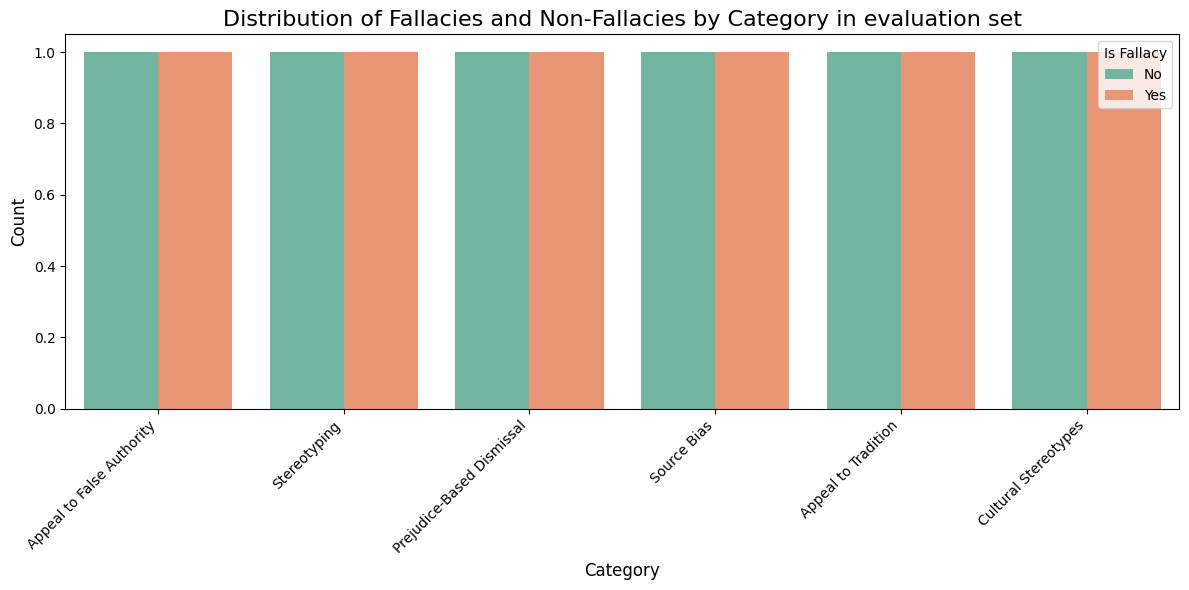

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already created the fallacy_df as in the previous example
df = fallacy_df
df['is_fallacy'] = df['is_fallacy'].astype(int)

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='is_fallacy', palette="Set2")

# Customize the plot
plt.title('Distribution of Fallacies and Non-Fallacies by Category in evaluation set', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fallacy', labels=['No', 'Yes'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# LLM test

In [4]:
from ollama import chat

model = "deepseek-r1:8b"
fallacy_df["result"] = ""
for i in range (len(fallacy_df)):
    text = fallacy_df["text"][i]
    display(text)
    formated_promt = promt.format(text=text)
    messages = [
            {
                "role": "user",
                "content": formated_promt
            }
        ]

    response = chat(model, messages = messages)['message']['content']
    display(response)
    fallacy_df["result"][i] = response


'The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy.'

'<think>\nAlright, I\'m looking at the text provided: "The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy." My task is to analyze this for genetic fallacies.\n\nFirst, I need to recall what a genetic fallacy is. It\'s when someone dismisses or validates an argument based solely on the source rather than the content of the argument itself. So, in this case, the endorsement by Tom Cruise is being used as a sole reason to conclude the diet plan is effective and healthy.\n\nThe sentence mentions that because Tom Cruise endorses it, it must be effective. This seems to ignore any actual evidence or information about the diet plan itself. Instead of evaluating the content or evidence behind the diet, the argument relies solely on who is endorsing it.\n\nLooking at confidence score guidelines, I need cases where the fallacy is clear and meets a 0.7-1.0 confidence level. Here, the reasoning is based entirely on Tom Cruise\'s credibility, which fits the 

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

'This new diet plan has been clinically tested and approved by registered dietitians, suggesting it may be effective and healthy.'

'<think>\nAlright, so I\'m trying to figure out if the given text is an example of a genetic fallacy. Let me break down what a genetic fallacy is first. From the definition, it\'s when someone dismisses or validates an argument based on where it came from, not its content. So, for instance, if someone says "MISSING" because they think that source is unreliable, that\'s a genetic fallacy.\n\nLooking at the text: "This new diet plan has been clinically tested and approved by registered dietitians, suggesting it may be effective and healthy." I need to analyze if this falls into any genetic fallacy category. \n\nThe first thing I notice is that the effectiveness of the diet plan is attributed to the source—registered dietitians. But wait, isn\'t that just providing evidence based on their credentials? So, are they dismissing or validating based on the source?\n\nIn this case, the text is saying that because registered dietitians have approved it, it\'s effective. It seems more like using 

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

'All pit bulls are dangerous because I heard about some pit bull attacks on the news.'

'<think>\nOkay, so I need to analyze this text for genetic fallacies. The user provided a specific structure for the JSON output and some rules to follow. Let me start by understanding what genetic fallacy means. It\'s when someone dismisses or validates an argument based on its source rather than its content.\n\nLooking at the text: "All pit bulls are dangerous because I heard about some pit bull attacks on the news." The person is asserting that all pit bulls are dangerous because they remember news stories about attacks. \n\nFirst, I should check if this is a genetic fallacy. They\'re generalizing based on specific incidents they\'ve heard about, which might not be representative of all pit bulls. This seems like a case where the person is using personal anecdotal evidence without broader data or context.\n\nSo, the quote is the text itself. The explanation would be that it\'s dismissing pit bulls as dangerous solely because of news stories, ignoring other possible factors. Confiden

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"Some pit bulls can be dangerous if not properly trained or socialized, as evidenced by reported attacks. However, individual temperament and upbringing play significant roles in a dog's behavior."

'<think>\nAlright, I need to analyze the given text for genetic fallacies. Let me first understand what genetic fallacies are. They occur when arguments are dismissed based on their source rather than their content.\n\nLooking at the text: "Some pit bulls can be dangerous if not properly trained or socialized, as evidenced by reported attacks. However, individual temperament and upbringing play significant roles in a dog\'s behavior."\n\nThe first sentence mentions pit bulls being dangerous, citing reported attacks. The second part talks about individual differences. \n\nIn the first statement, the conclusion is drawn solely from the source of information ("reported attacks"). It doesn\'t present evidence or analysis beyond pointing to incidents, which is a weak argument. So that\'s a genetic fallacy because it\'s using the existence of attacks as an argument without context or further explanation.\n\nThe second part discusses individual factors like temperament and upbringing, which a

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"I won't consider this young candidate's policy proposals because they're too inexperienced to understand complex political issues."

'<think>\nOkay, so I need to analyze the given text for genetic fallacies. The user has provided a specific structure and rules, so I should follow those carefully.\n\nFirst, I\'ll read the text: "I won\'t consider this young candidate\'s policy proposals because they\'re too inexperienced to understand complex political issues." \n\nI remember that genetic fallacy is when arguments are dismissed based on their source rather than their content. So, I need to check if the speaker is invalidating the candidate solely because of their age or experience.\n\nThe statement says "young candidate" and dismisses their proposals because they\'re "too inexperienced." That seems to be dismissing the policies based on the source (the candidate\'s youth) rather than the content of the policies themselves. \n\nI should look for other instances, but in this case, there\'s only one quote provided. So I might have just one fallacy here.\n\nNow, confidence score: Is it ≥0.7? Yes, because the reasoning is

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"I'll evaluate this young candidate's policy proposals based on their merits, feasibility, and potential impact, regardless of the candidate's age."

'<think>\nOkay, so I need to analyze the given text for genetic fallacies. Let me first understand what genetic fallacies are. From the definitions provided, a genetic fallacy occurs when arguments or information are dismissed or validated based solely on their source rather than their content. So, it\'s about the origin of the claim rather than its merits.\n\nLooking at the text: "I\'ll evaluate this young candidate\'s policy proposals based on their merits, feasibility, and potential impact, regardless of the candidate\'s age." The key part here is "regardless of the candidate\'s age." \n\nNow, I need to assess if this statement exhibits a genetic fallacy. The phrase suggests that the evaluator is focusing solely on the policies themselves (merits, feasibility, impact) without considering any attributes of the candidate, like their age. In other words, they\'re not dismissing or validating based on who the candidate is, but rather what the candidate is proposing.\n\nWait, does this m

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"This article criticizing the company's environmental practices can't be trusted because it was written by a former employee."

'<think>\nOkay, so I\'m trying to analyze this text for genetic fallacies. The user wants me to find instances where someone dismisses or validates an argument based solely on who said it, rather than the content itself.\n\nLooking at the text: "This article criticizing the company\'s environmental practices can\'t be trusted because it was written by a former employee." \n\nHmm, the person is saying the article isn\'t trustworthy just because the author used to work there. So they\'re dismissing the critique based on the source—former employee. That sounds like a genetic fallacy because they\'re focusing on who wrote it instead of the content.\n\nI should check if this meets the confidence threshold. The reasoning here is pretty straightforward. They’re directly attributing credibility based on the author\'s employment status, which fits the definition. Confidence is high, maybe around 0.8 to 0.9 since it’s a clear case without much ambiguity.\n\nContext-wise, it\'s about dismissing c

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"This article criticizing the company's environmental practices, written by a former employee, provides insider perspective. However, we should cross-reference its claims with other independent sources to ensure accuracy."

'<think>\nAlright, so I need to analyze this text for genetic fallacies. Let me start by understanding what genetic fallacies are. From the definition, it\'s when arguments or information are dismissed based solely on their source rather than their content. So, if someone dismisses a claim just because it\'s from a certain type of source, like an insider or a former employee, that\'s a genetic fallacy.\n\nLooking at the text: "This article criticizing the company\'s environmental practices, written by a former employee, provides insider perspective. However, we should cross-reference its claims with other independent sources to ensure accuracy." \n\nThe first part mentions that the article is written by a former employee and refers to it as an insider perspective. The phrase "provides insider perspective" could be implying that just because someone is a former employee, their critique holds more weight or credibility. But actually, the source\'s status (being an insider) shouldn\'t aut

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"We've always done our accounting this way, so there's no need to switch to new software systems."

'<think>\nAlright, I\'m trying to analyze the given text for genetic fallacies. The user has provided a specific query about genetic fallacies in political texts and wants me to follow certain output rules. First, I\'ll read through their instructions carefully.\n\nThe task is to return exactly one JSON object with details of any genetic fallacies found in the provided text. If none are found with high confidence (≥0.7), then return an empty array in \'found_fallacy\' along with a summary indicating no falls.\n\nLooking at the definitions, a genetic fallacy occurs when arguments or information are dismissed based on their source rather than their content. The example given is "MISSING," which I assume refers to a common type of misclassified fallacy.\n\nThe text to analyze is: "We\'ve always done our accounting this way, so there\'s no need to switch to new software systems."\n\nI\'ll break this down. The statement suggests that because something has been done a certain way before (sou

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"Let's compare our current accounting method with new software systems to determine which approach is most efficient and accurate for our needs."

'<think>\nOkay, so I need to analyze this political text for genetic fallacies. The user provided a specific structure they want the output in, including JSON format without any extra text or code markers. They also mentioned focusing on unique cases with high confidence.\n\nFirst, let\'s understand what a genetic fallacy is. It\'s when someone dismisses an argument based on where it originated from, not its content. So, if someone says "X is wrong because they\'re part of the left-wing establishment," that\'s using origin as a reason, which is a fallacy.\n\nLooking at the text: "Let\'s compare our current accounting method with new software systems to determine which approach is most efficient and accurate for our needs." The text is about evaluating methods based on their effectiveness. \n\nI need to see if there\'s any mention of the source of the methods. The text doesn\'t specify where the methods come from, like whether they\'re from a particular group or establishment. It just t

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"She's from Italy, so she must be an excellent cook."

'<think>\nAlright, I need to analyze the given text for genetic fallacies. The text is: "She\'s from Italy, so she must be an excellent cook." \n\nFirst, I\'ll try to understand what a genetic fallacy is. It\'s when someone dismisses or validates a claim based on where it came from, rather than its content. So, the argument here is that being Italian means one is a good cook.\n\nLooking at this statement, it seems to assume that all Italians are excellent cooks. That might be a stereotype or generalization about Italian people. The person is attributing cooking skill based solely on nationality without evidence or personal experience.\n\nI should check if there\'s a clear example of genetic fallacy here. Yes, the reasoning relies entirely on her origin rather than any specific trait she possesses. \n\nNext, I\'ll assess confidence. Is this clearly a genetic fallacy? It seems to be a stereotype, so high confidence, probably 0.9 or above because it\'s a well-known type of reasoning error

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

"She's from Italy, which has a rich culinary tradition. It would be interesting to learn if she has any favorite Italian recipes or cooking techniques."

'<think>\nOkay, so I need to analyze the given text for genetic fallacies. First, I should make sure I understand what a genetic fallacy is. From the definition, it\'s when someone dismisses or validates an argument based on its source rather than its content.\n\nLooking at the text: "She\'s from Italy, which has a rich culinary tradition." The next part says, "It would be interesting to learn if she has any favorite Italian recipes or cooking techniques."\n\nHmm, the second sentence mentions that it would be interesting to know her favorites. But wait, is there an implication here about her being Italian affecting her cooking? Maybe the suggestion is that because she\'s from Italy, her recipes are automatically valuable or interesting.\n\nI think this could be a genetic fallacy because it\'s implying that her origin (Italian) makes her expertise in cooking valid or desirable, rather than considering her skills or achievements. So the source (Italy\'s culinary tradition) might be used 

C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fallacy_df["result"][i] = response
C:\Users\david\AppData\Local\Temp\ipykernel_25492\840882239.py:18: SettingWithCopyWarning: 
A

In [8]:
print(fallacy_df[["is_fallacy", "result"]])

    is_fallacy                                             result
0            1  <think>\nAlright, I'm looking at the text prov...
1            0  <think>\nAlright, so I'm trying to figure out ...
2            1  <think>\nOkay, so I need to analyze this text ...
3            0  <think>\nAlright, I need to analyze the given ...
4            1  <think>\nOkay, so I need to analyze the given ...
5            0  <think>\nOkay, so I need to analyze the given ...
6            1  <think>\nOkay, so I'm trying to analyze this t...
7            0  <think>\nAlright, so I need to analyze this te...
8            1  <think>\nAlright, I'm trying to analyze the gi...
9            0  <think>\nOkay, so I need to analyze this polit...
10           1  <think>\nAlright, I need to analyze the given ...
11           0  <think>\nOkay, so I need to analyze the given ...


In [9]:
df["result"][0]

'<think>\nAlright, I\'m looking at the text provided: "The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy." My task is to analyze this for genetic fallacies.\n\nFirst, I need to recall what a genetic fallacy is. It\'s when someone dismisses or validates an argument based solely on the source rather than the content of the argument itself. So, in this case, the endorsement by Tom Cruise is being used as a sole reason to conclude the diet plan is effective and healthy.\n\nThe sentence mentions that because Tom Cruise endorses it, it must be effective. This seems to ignore any actual evidence or information about the diet plan itself. Instead of evaluating the content or evidence behind the diet, the argument relies solely on who is endorsing it.\n\nLooking at confidence score guidelines, I need cases where the fallacy is clear and meets a 0.7-1.0 confidence level. Here, the reasoning is based entirely on Tom Cruise\'s credibility, which fits the 

In [12]:
import json
def clean_deepseek_result(text):
    json_start = text.find('json') + len('json')
    json_end = text.rfind('```')
    json_str = text[json_start:json_end].strip()
    return json.loads(json_str)

In [ ]:
display(clean_deepseek_result(df["result"][0]))

{'found_fallacy': [{'quote': 'The famous actor Tom Cruise endorses this new diet plan, so it must be effective and healthy.',
   'explanation': "This statement dismisses or validates the diet plan based solely on Tom Cruise's endorsement without considering other factors.",
   'confidence': 0.8,
   'context': 'The argument relies solely on the source of the endorsement rather than evaluating the content.'}],
 'summary': {'count': 1,
  'average_confidence': 0.8,
  'highest_confidence': 0.8,
  'lowest_confidence': 0.8}}

In [13]:
df["clean_result"] = df["result"].apply(clean_deepseek_result)

In [14]:
print(fallacy_df[["is_fallacy", "clean_result"]])

    is_fallacy                                       clean_result
0            1  {'found_fallacy': [{'quote': 'The famous actor...
1            0  {'found_fallacy': [], 'summary': {'count': 0, ...
2            1  {'found_fallacy': [{'quote': 'All pit bulls ar...
3            0  {'found_fallacy': [{'quote': 'Some pit bulls c...
4            1  {'found_fallacy': [{'quote': 'I won't consider...
5            0  {'found_fallacy': [], 'summary': {'count': 0, ...
6            1  {'found_fallacy': [{'quote': 'This article cri...
7            0  {'found_fallacy': [{'quote': 'This article cri...
8            1  {'found_fallacy': [{'quote': 'We've always don...
9            0  {'found_fallacy': [], 'summary': {'count': 0, ...
10           1  {'found_fallacy': [{'quote': 'She's from Italy...
11           0  {'found_fallacy': [{'quote': 'It would be inte...


In [ ]:
df.to_csv("test_02.02.2025.csv")